In [1]:
# Data Analytics and Proposal for Investment

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pycountry
from scipy.stats import linregress

In [3]:
# Setup for API
import hvplot.pandas
import requests
from pprint import pprint
from api_keys import geoapify_key

In [4]:
# Data Loading and Preparation

In [5]:
# Data File
hotel_data_path = "data/hotel_bookings.csv"

# Read Data File and store DataFrames
hotel_data = pd.read_csv(hotel_data_path)

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Create a new DataFrame
new_hotel_data = hotel_data.copy()

# Rename columns for better understanding
rename_columns = {
    'hotel': 'Hotel',
    'is_canceled': 'Is canceled',
    'lead_time': 'Lead time',
    'arrival_date_year': 'Arrival date year',
    'arrival_date_month': 'Arrival date month',
    'arrival_date_week_number': 'Arrival date week number',
    'arrival_date_day_of_month': 'Arrival date day of month',
    'stays_in_weekend_nights': 'Stays in weekend nights',
    'stays_in_week_nights': 'Stays in week nights',
    'adults': 'Adults',
    'children': 'Children',
    'babies': 'Babies',
    'meal': 'Meal',
    'country': 'Country',
    'market_segment': 'Market segment',
    'distribution_channel': 'Distribution channel',
    'is_repeated_guest': 'Is repeated guest',
    'previous_cancellations': 'Previous cancellations',
    'previous_bookings_not_canceled': 'Previous bookings not canceled',
    'reserved_room_type': 'Reserved room type',
    'assigned_room_type': 'Assigned room type',
    'booking_changes': 'Booking changes',
    'deposit_type': 'Deposit type',
    'agent': 'Agent',
    'company': 'Company',
    'days_in_waiting_list': 'Days in waiting list',
    'customer_type': 'Customer type',
    'adr': 'ADR',
    'required_car_parking_spaces': 'Required car parking spaces',
    'total_of_special_requests': 'Total of special requests',
    'reservation_status': 'Reservation status',
    'reservation_status_date': 'Reservation status date'
}

# Rename DataFrame columns using dictionary
new_hotel_data.rename(columns=rename_columns, inplace=True)

new_hotel_data.columns

Index(['Hotel', 'Is canceled', 'Lead time', 'Arrival date year',
       'Arrival date month', 'Arrival date week number',
       'Arrival date day of month', 'Stays in weekend nights',
       'Stays in week nights', 'Adults', 'Children', 'Babies', 'Meal',
       'Country', 'Market segment', 'Distribution channel',
       'Is repeated guest', 'Previous cancellations',
       'Previous bookings not canceled', 'Reserved room type',
       'Assigned room type', 'Booking changes', 'Deposit type', 'Agent',
       'Company', 'Days in waiting list', 'Customer type', 'ADR',
       'Required car parking spaces', 'Total of special requests',
       'Reservation status', 'Reservation status date'],
      dtype='object')

In [8]:
# View content by country, display the country column.
new_hotel_data['Country'].astype(str).unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'nan', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

In [9]:
# Function to get country name
def get_country_name(alpha_3):
    if pd.isnull(alpha_3):
        return 'NULL'
    try:
        # Get the country name
        return pycountry.countries.get(alpha_3=alpha_3.upper()).name
    except (AttributeError, LookupError):
        return alpha_3

# Replace the 'country' column with country names
new_hotel_data['Country'] = new_hotel_data['Country'].apply(get_country_name)

In [10]:
# Display the values that were not replaced
no_match = new_hotel_data[new_hotel_data['Country'].isin(hotel_data['country'])]['Country'].unique()
print("Values not found in pycountry and not replaced:")
print(no_match)


Values not found in pycountry and not replaced:
['CN' 'TMP']


In [11]:
# Dictionary with unmatched country codes and their names
manual_country_replacements = {'CN': 'China', 'TMP': 'Timor-Leste'}

# Apply manual replacements
new_hotel_data['Country'] = new_hotel_data['Country'].replace(manual_country_replacements)

In [12]:
# Ordered list of countries
unique_countries = sorted(new_hotel_data['Country'].unique())
unique_countries

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia, Plurinational State of',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'French Southern Territories',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary

In [13]:
# Replacement dictionary for the 'Market segment' column
market_segment_replacements = {
    'Offline TA/TO': 'Offline  Travel Agency / Tour Operators',
    'Online TA': 'Online Travel Agency',
}

# Replace acronyms with full names in the 'Market segment' column
new_hotel_data['Market segment'] = new_hotel_data['Market segment'].replace(market_segment_replacements)

In [14]:
# Check changes
new_hotel_data['Market segment'].unique()

array(['Direct', 'Corporate', 'Online Travel Agency',
       'Offline  Travel Agency / Tour Operators', 'Complementary',
       'Groups', 'Undefined', 'Aviation'], dtype=object)

In [15]:
# Replacement dictionary for the 'Distribution channel' column
distribution_channel_replacements = {'TA/TO': 'Travel Agency / Tour Operators', 'GDS': 'Global Distribution System'}

# Replace acronyms with full names in the 'Distribution channel' column
new_hotel_data['Distribution channel'] = new_hotel_data['Distribution channel'].replace(distribution_channel_replacements)

In [16]:
# Check changes
new_hotel_data['Distribution channel'].unique()

array(['Direct', 'Corporate', 'Travel Agency / Tour Operators',
       'Undefined', 'Global Distribution System'], dtype=object)

In [17]:
# Replacement dictionary for the 'Meal' column
meal_replacements = {
    'SC': 'Self-catering',
    'BB': 'Bed and breakfast',
    'HB': 'Half board',
    'FB': 'Full board'
}

# Replace acronyms with full names in the 'Meal' column
new_hotel_data['Meal'] = new_hotel_data['Meal'].replace(meal_replacements)

In [18]:
# Check changes
new_hotel_data['Meal'].unique()

array(['Bed and breakfast', 'Full board', 'Half board', 'Self-catering',
       'Undefined'], dtype=object)

In [19]:
# Remove duplicate rows to prevent skewing the analysis.
new_hotel_data.drop_duplicates(inplace=True)

In [20]:
# Check columns for null values
null_columns = new_hotel_data.columns[new_hotel_data.isnull().any()].tolist()
print("Columns with null values:")
print(null_columns)

Columns with null values:
['Children', 'Agent', 'Company']


In [21]:
# Check the data in the 'Children' column
new_hotel_data['Children'].astype(str).unique()

array(['0.0', '1.0', '2.0', '10.0', '3.0', 'nan'], dtype=object)

In [22]:
# Check the data in the 'Agent' column
new_hotel_data['Agent'].astype(str).unique()

array(['nan', '304.0', '240.0', '303.0', '15.0', '241.0', '8.0', '250.0',
       '115.0', '5.0', '175.0', '134.0', '156.0', '243.0', '242.0', '3.0',
       '105.0', '40.0', '147.0', '306.0', '184.0', '96.0', '2.0', '127.0',
       '95.0', '146.0', '9.0', '177.0', '6.0', '143.0', '244.0', '149.0',
       '167.0', '300.0', '171.0', '305.0', '67.0', '196.0', '152.0',
       '142.0', '261.0', '104.0', '36.0', '26.0', '29.0', '258.0',
       '110.0', '71.0', '181.0', '88.0', '251.0', '275.0', '69.0',
       '248.0', '208.0', '256.0', '314.0', '126.0', '281.0', '273.0',
       '253.0', '185.0', '330.0', '334.0', '328.0', '326.0', '321.0',
       '324.0', '313.0', '38.0', '155.0', '68.0', '335.0', '308.0',
       '332.0', '94.0', '348.0', '310.0', '339.0', '375.0', '66.0',
       '327.0', '387.0', '298.0', '91.0', '245.0', '385.0', '257.0',
       '393.0', '168.0', '405.0', '249.0', '315.0', '75.0', '128.0',
       '307.0', '11.0', '436.0', '1.0', '201.0', '183.0', '223.0',
       '368.0', '3

In [23]:
# Replace 'nan' values in 'Children' and 'Agent' with 0
new_hotel_data = new_hotel_data.assign(
    Children=new_hotel_data['Children'].fillna(0),
    Agent=new_hotel_data['Agent'].fillna(0)
)

In [24]:
# Convert columns to appropriate data types
new_hotel_data['Arrival date month'] = new_hotel_data['Arrival date month'].astype('category')
new_hotel_data['Children'] = new_hotel_data['Children'].astype('int64')
new_hotel_data['Agent'] = new_hotel_data['Agent'].fillna(0).astype('int64')
new_hotel_data['Reservation status date'] = pd.to_datetime(new_hotel_data['Reservation status date'])

In [25]:
new_hotel_data.dtypes

Hotel                                     object
Is canceled                                int64
Lead time                                  int64
Arrival date year                          int64
Arrival date month                      category
Arrival date week number                   int64
Arrival date day of month                  int64
Stays in weekend nights                    int64
Stays in week nights                       int64
Adults                                     int64
Children                                   int64
Babies                                     int64
Meal                                      object
Country                                   object
Market segment                            object
Distribution channel                      object
Is repeated guest                          int64
Previous cancellations                     int64
Previous bookings not canceled             int64
Reserved room type                        object
Assigned room type  

In [26]:
# Add a 'Stay duration' column that calculates the total length of stay
new_hotel_data['Stay duration'] = new_hotel_data['Stays in weekend nights'] + new_hotel_data['Stays in week nights']

In [27]:
# Add a 'Total guests' column that adds adults, children and babies
new_hotel_data['Total guests'] = new_hotel_data['Adults'] + new_hotel_data['Children'] + new_hotel_data['Babies']

In [28]:
# Create a new date column combining year, month and day
new_hotel_data['Arrival date'] = pd.to_datetime(new_hotel_data[[
    'Arrival date year', 'Arrival date month', 'Arrival date day of month']]
                                                .astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')

In [29]:
# Create a new column to get the departure date
new_hotel_data['Departure date'] = new_hotel_data['Arrival date'] + pd.to_timedelta(
    new_hotel_data['Stay duration'], unit='d')

In [30]:
# Analysis and Visualization

In [31]:
## TOP 20 trends per Country

# Function to get coordinates from Geoapify with error
def get_coordinates(country_name, api_key):
    try:
        url = f"https://api.geoapify.com/v1/geocode/search?text={country_name}&apiKey={api_key}"
        response = requests.get(url).json()
        if response['features']:
            coords = response['features'][0]['geometry']['coordinates']
            return coords[1], coords[0]
    except Exception as e:
        print(f"Error looking coordinates for {country_name}: {e}")
    return None, None

country_distribution = new_hotel_data['Country'].value_counts().head(20)
country_counts = country_distribution.reset_index()
country_counts.columns = ['Country', 'Count']

# Add coordinates to the DataFrame
country_counts[['Latitude', 'Longitude']] = country_counts.apply(
    lambda x: pd.Series(get_coordinates(x['Country'], geoapify_key)), axis=1)

# Filter out rows with missing coordinates
country_counts = country_counts.dropna()

# Normalize the sizes for better visualization
min_size = 150
max_size = 750
country_counts['size_normalized'] = ((country_counts['Count'] - country_counts['Count'].min()) / 
                                    (country_counts['Count'].max() - country_counts['Count'].min()) * 
                                    (max_size - min_size) + min_size)

# Create an interactive map
map_plot = country_counts.hvplot.points(
    'Longitude', 'Latitude', geo=True, size='size_normalized', 
    color='Count', cmap='coolwarm', hover_cols=['Count', 'Country'], 
    tiles='OSM', title='Geographical Distribution of Customers (Top 20 Countries)', 
    alpha=0.6, width=800, height=600
)

map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Count,size_normalized,Country)

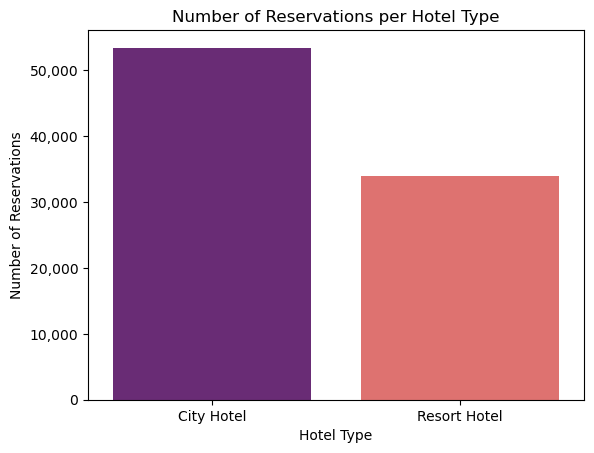

In [32]:
## Trends per Type of Hotel

# Number of bookings per hotel type
hotel_trends = new_hotel_data['Hotel'].value_counts().reset_index()
hotel_trends.columns = ['Hotel', 'Count']

# Create plot
sns.barplot(x='Hotel', y='Count', data=hotel_trends, hue='Hotel', dodge=False, palette='magma', legend=False)
plt.title('Number of Reservations per Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Reservations')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_01.png")
plt.show()


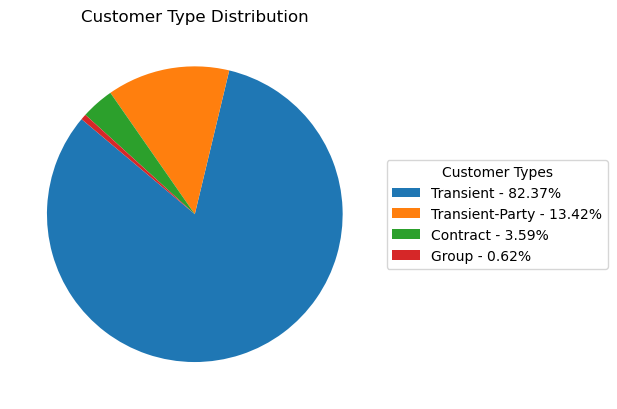

In [33]:
## Trends per Type of Customer

# Calculate the percentages of bookings per customer type
customer_type_trends = new_hotel_data['Customer type'].value_counts()
percentages = 100 * customer_type_trends / customer_type_trends.sum()
labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(customer_type_trends.index, percentages)]

fig, ax = plt.subplots()
wedges, texts = ax.pie(customer_type_trends, startangle=140, textprops=dict(color="w"))

# Remove percentage labels
for text in texts:
    text.set_text('')

# Create plot
plt.legend(wedges, labels, title="Customer Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Customer Type Distribution')
plt.ylabel('')

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_02.png", bbox_inches="tight")
plt.show()

In [34]:
# Additional Analysis and Investment Proposal

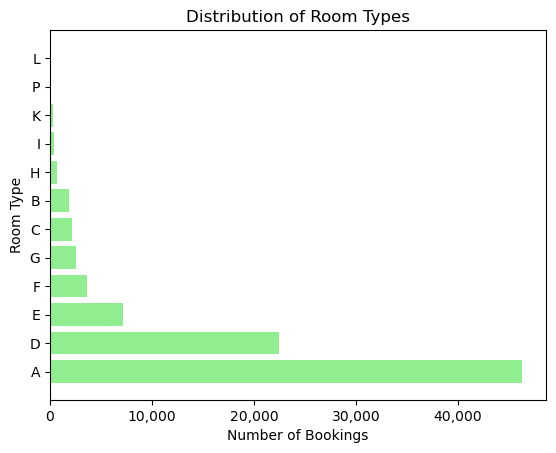

In [35]:
## Distribution of Room Types

# Room type distribution
room_type_counts = new_hotel_data['Assigned room type'].value_counts()

# Create plot
plt.barh(room_type_counts.index, room_type_counts.values, color='lightgreen')
plt.xlabel("Number of Bookings")
plt.ylabel("Room Type")
plt.title("Distribution of Room Types")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_03.png")
plt.show()

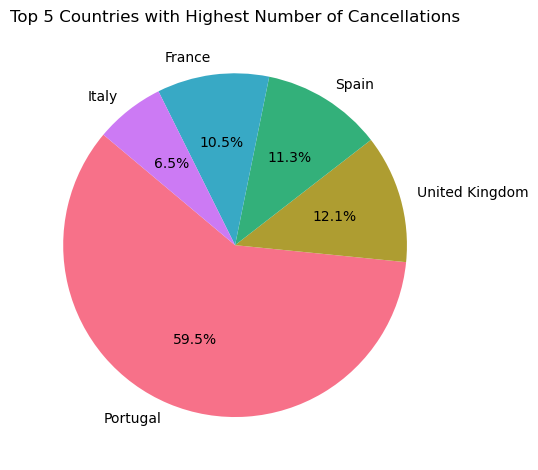

In [36]:
## Cancellations by Country

# Calculate the number of cancellations by country
cancellation_data = new_hotel_data[new_hotel_data['Is canceled'] == 1]
cancellations_by_country = cancellation_data['Country'].value_counts().head(5)
top5_canceled = cancellations_by_country.reset_index()
top5_canceled.columns = ['Country', 'Canceled']

# Create plot
fig, ax = plt.subplots()
colors = sns.color_palette('husl', len(top5_canceled))
wedges, texts, autotexts = ax.pie(
    top5_canceled['Canceled'], labels=top5_canceled['Country'], autopct='%1.1f%%', startangle=140, colors=colors
)
plt.title("Top 5 Countries with Highest Number of Cancellations")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_04.png")
plt.show()



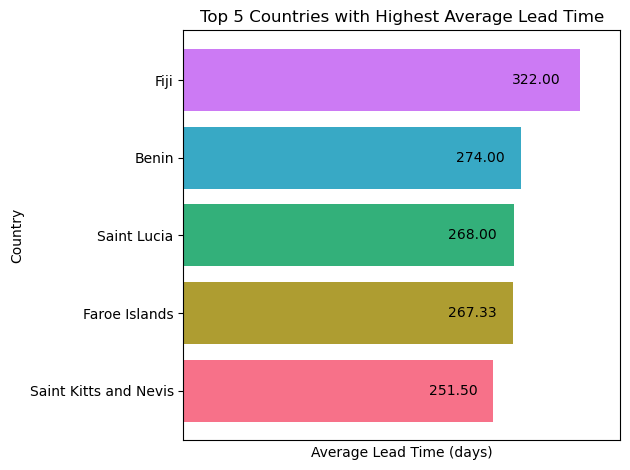

In [37]:
## Average Lead Time by Country

# Calculate the average lead time by country
average_lead_time_by_country = new_hotel_data.groupby('Country')['Lead time'].mean()
top5_countries = average_lead_time_by_country.sort_values(ascending=False).head(5)
top5_countries = top5_countries.sort_values(ascending=True)

# Create plot
plt.barh(top5_countries.index, top5_countries.values, color=sns.color_palette('husl', len(top5_countries)))
plt.xlabel("Average Lead Time (days)")
plt.ylabel("Country")
plt.title("Top 5 Countries with Highest Average Lead Time")
plt.xticks([])

# Add text labels on the bars and position inside the bars
for index, value in enumerate(top5_countries.values):
    plt.text(value * 0.95, index, f'{value:,.2f}', va='center', ha='right', color='black')

# Set x limit
plt.xlim(0, max(top5_countries.values) * 1.1)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_05.png")
plt.show()


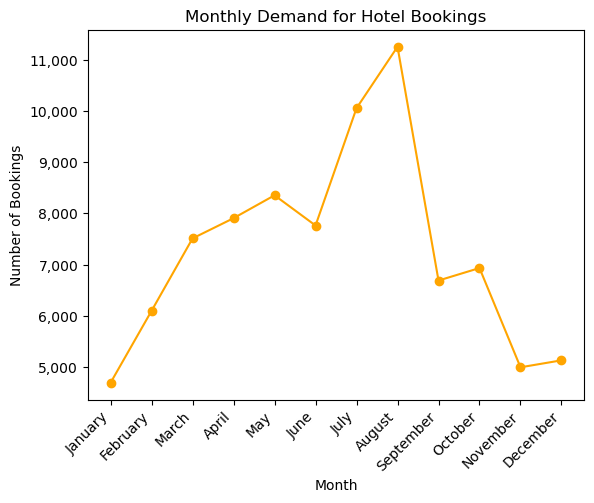

In [38]:
## Monthly Demand

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Arrival date month' to a categorical type with the defined order
new_hotel_data['Arrival date month'] = pd.Categorical(new_hotel_data['Arrival date month'], categories=month_order, ordered=True)

# Group by 'Arrival date month' and count the number of bookings
monthly_demand = new_hotel_data.groupby('Arrival date month', observed=True)['Hotel'].count()

# Create plot
plt.plot(monthly_demand.index, monthly_demand.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Monthly Demand for Hotel Bookings")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_06.png")
plt.show()


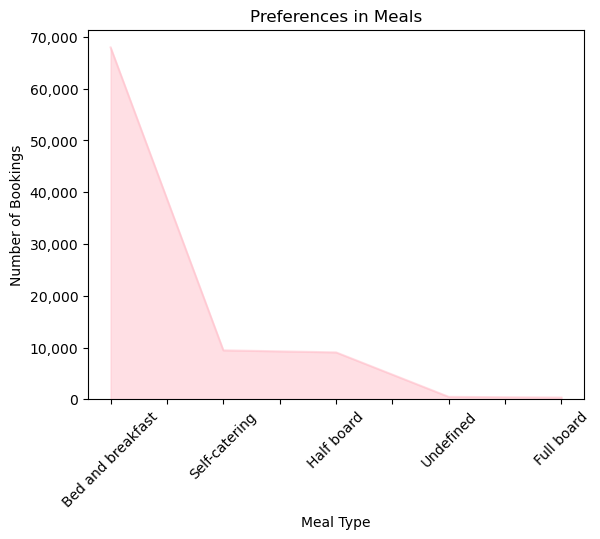

In [39]:
## Preferences in Meal Types

# Calculate the number of bookings per meal type
meal_preferences = new_hotel_data['Meal'].value_counts()

# Create plot
meal_preferences.plot(kind='area', color='pink', alpha=0.5)
plt.title('Preferences in Meals')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_07.png")
plt.show()


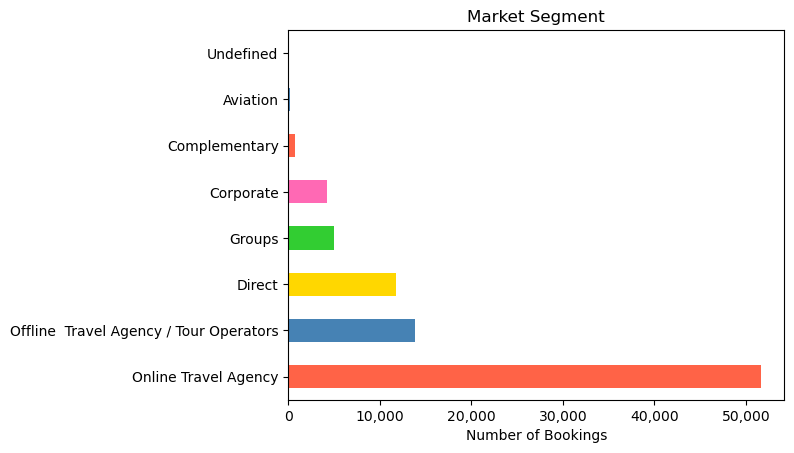

In [40]:
## Most Common Market Segment

# Calculate the number of bookings per market segment
market_segment_usage = new_hotel_data['Market segment'].value_counts()

# Create plot
primary_colors = ['#FF6347', '#4682B4', '#FFD700', '#32CD32', '#FF69B4']
market_segment_usage.plot(kind='barh', color=primary_colors[:len(market_segment_usage)])
plt.title('Market Segment')
plt.xlabel('Number of Bookings')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_08.png", bbox_inches='tight')
plt.show()


In [41]:
# Export the Data into a csv
new_hotel_data.to_csv("output_data/new_hotel_data.csv", index_label="")

In [42]:
# Data Analytics and Proposal for Investment


## Trends by Country

### The geographic distribution of customers (Top 20 countries) reveals which countries have the highest number of bookings.
### This helps to identify key markets and regions with high demand and to be able to channel promotion or marketing to these countries.

## Key Insights:
### Geographical Distribution: High booking numbers from countries with dense populations and developed economies, 
### such as the United States, China, and various European countries, indicating strong demand from these regions.

### Cancellations by Country: Some countries have higher cancellation rates. Countries like Portugal, United Kingodom, and Spain
### show significant cancellations, possibly due to economic, political or cultural factors, and this section would need to be further
### investigated in order to come up with a proposal to avoid cancellations.

### Average Lead Time by Country: Countries like Fiji, Benin, and Saint Lucia show longer lead times, 
### indicating that travelers from these regions plan their trips well in advance. This is crucial for inventory and marketing planning,
### channeling efforts to make early promotions in months they book.


## Trends by Type of Hotel

### Analyzing the number of bookings per hotel type provides insights into customer preferences for different accommodation options.

## Key Insights:
### Number of Reservations: Certain hotel types, like city hotels, may be more popular compared to resorts due to their accessibility and
### proximity to business and tourist centers.

### Customer Preferences: Preferences vary based on travel purpose. Business travelers might prefer hotels with conference services and
### proximity to business districts, while leisure travelers may prefer resorts with recreational activities.

### Capacity and Room Type: The distribution of assigned room types shows customer preferences for standard rooms vs. suites or luxury rooms.


## Trends by Type of Customer

### Understanding trends by customer type is crucial for tailoring services and marketing strategies.

## Key Insights:
### Customer Type Distribution: A majority of customers may be transient, with fewer contract or group customers.
### This suggests that most travelers are individuals or families booking independently.

### Common Market Segments: The market segment analysis shows that online travel agencies (OTAs) and offline tour operators are heavily used.
### This suggests that digital marketing strategies and partnerships with travel agencies are essential.

### Dining preferences: Preferences for dining types help understand customer needs and influence booking decisions.
### We can determine that it may be the model of the hotels which offer the breakfast service included,
## or think that a tourist is more interested in the gastronomy of the country he visits.

In [43]:
# Investment Proposal for Alternative Accommodation

## Based on the observed trends, an investment in alternative accommodation could focus on:

### Diversifying Offerings: Investing in various accommodation options like apartments, rural houses, and budget-friendly
### options to cater to different market segments and customer needs.

### Market Segmentation: Targeting marketing campaigns to the most profitable segments, such as transient customers and those booking through OTAs.

### Optimizing Inventory: Managing supply according to seasonal demand and customer preferences to maximize occupancy and revenue.

### Enhancing Customer Experience: Implementing services and amenities based on customer preferences and behaviors,
### such as varied meal options and flexible cancellation policies.


In [44]:
# TEST
country_name = "Italy"
url = f"https://api.geoapify.com/v1/geocode/search?text={country_name}&apiKey={geoapify_key}"
response = requests.get(url).json()
pprint(response)


{'features': [{'bbox': [6.6272658, 35.2889616, 18.7844746, 47.0921462],
               'geometry': {'coordinates': [12.674297, 42.6384261],
                            'type': 'Point'},
               'properties': {'address_line1': 'Italy',
                              'address_line2': '',
                              'category': 'administrative',
                              'country': 'Italy',
                              'country_code': 'it',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database License',
                                             'sourcename': 'openstreetmap',
                                             'url': 'https://www.openstreetmap.org/copyright'},
                              'formatted': 'Italy',
                              'lat': 42.6384261,
                              'lon':